# homework 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## code to compute spike-triggered averages



In [18]:
def compute_sta(data, tau):
    stimuli = data['stim']  # Extract the stimulus time-series
    spikes = data['rho']    # Extract the spike-train time-series

    # Find the indices of all spikes that occur after `tau` timesteps
    spike_times = spikes[tau:].nonzero()[0] + tau

    # Initialize an array to hold all the stimulus windows that lead up to spikes
    all_stimuli = np.zeros((len(spike_times), tau))

    # Fill the `all_stimuli` array with stimulus windows
    for index, spike in enumerate(spike_times):
        all_stimuli[index, :] = stimuli[spike - tau:spike]

    # Compute the average stimulus leading up to a spike (STA)
    sta = all_stimuli.mean(axis=0)
    std = all_stimuli.std(axis=0)

    return sta, std

## analysing H1 data

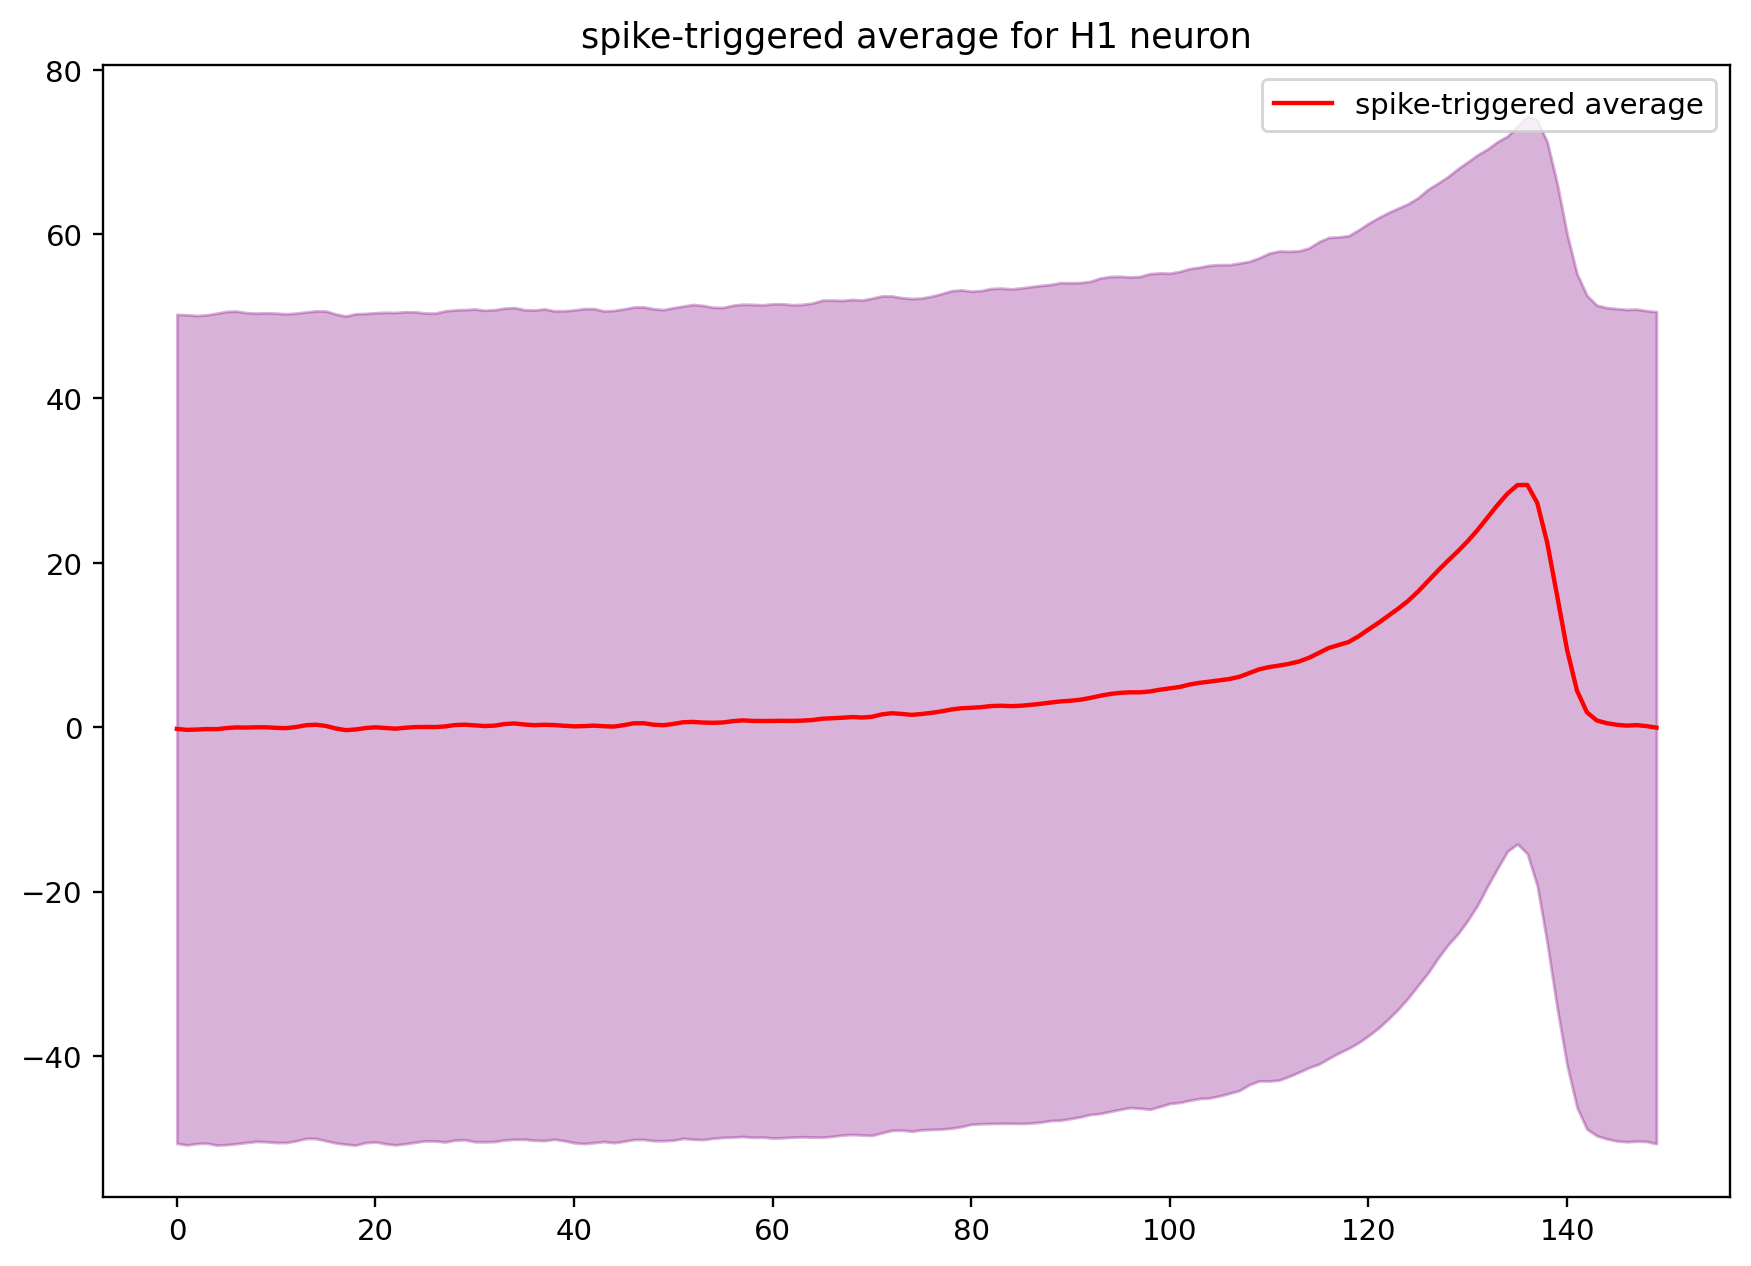

53601

In [26]:
FILENAME = 'resources/module 2/c1p8.pickle'

with open(FILENAME, 'rb') as f:
    h1_data = pickle.load(f)


spike_indices = h1_data['rho'].nonzero()[0] + 150
stim = h1_data['stim']

total_spikes = len(spike_indices)

sta, std = compute_sta(h1_data, 150)

plt.figure(figsize=(10,7), dpi = 210)
plt.fill_between(range(150), sta - std, sta + std, color='purple', alpha=0.3)
plt.plot(sta, color = 'red', label = 'spike-triggered average')
plt.legend()
plt.title('spike-triggered average for H1 neuron')
plt.show()


total_spikes

In [43]:
from scipy.optimize import fsolve

# Define the function to represent the equation
def equation(r):
    term1 = (r - 7)**2 / 2
    term2 = 8 * (r - 5)**2
    ln_4 = np.log(4)
    return term1 - term2 + ln_4

# Initial guess
initial_guess = 6.0

# Solve the equation
solution = fsolve(equation, initial_guess)[0]

print(f"The optimal decision threshold for r is approximately: {solution:.4f}")


The optimal decision threshold for r is approximately: 5.5517
